In [1]:
import numpy as np
import pandas as pd
import os
import warnings     # for supressing a warning when importing large files
warnings.filterwarnings("ignore")

In [2]:
medicare_fraud=pd.read_csv("TRAIN1.csv")

In [3]:
pd.set_option('display.max_columns', None)
medicare_fraud.head()

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,AdmitForDays,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,5953,42731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1930-05-01,NaN,1,1,1,1,660,12,12,1,1,1,1,0,0,1,1,0,0,0,0,0,300,110,80.0,0.0
1,PRV51001,No,BENE24646,CLM372475,2009-05-22,2009-05-23,700,PHY405682,NaN,PHY402512,78650,51889,V5869,4019,V4581,49320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1943-03-01,NaN,1,1,0,1,440,12,12,1,0,0,0,0,0,1,1,1,0,1,0,0,720,10,67.0,0.0
2,PRV51001,No,BENE31617,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,V446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,59970,NaN,NaN,NaN,NaN,1933-08-01,NaN,2,1,0,1,660,12,12,0,0,1,0,0,0,1,1,0,1,0,0,0,1380,370,76.0,0.0
3,PRV51001,No,BENE32715,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,78964,V442,5589,2720,33829,25002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,78902,NaN,NaN,NaN,NaN,1936-03-01,NaN,1,1,0,1,410,12,12,1,1,1,1,1,1,1,1,0,0,0,2020,1068,6700,2700,74.0,0.0
4,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,NaN,NaN,29650,2971,3051,V1254,07070,28260,7823,49300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1068.0,29623,2009-07-04,2009-07-08,882,5.0,1940-07-01,NaN,1,1,0,1,510,12,12,0,1,1,0,0,1,1,1,0,0,1,36000,1068,3520,140,69.0,0.0


In [4]:
medicare_fraud.shape

(558211, 58)

In [5]:
list(medicare_fraud.columns)

['Provider',
 'PotentialFraud',
 'BeneID',
 'ClaimID',
 'ClaimStartDt',
 'ClaimEndDt',
 'InscClaimAmtReimbursed',
 'AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'DeductibleAmtPaid',
 'ClmAdmitDiagnosisCode',
 'AdmissionDt',
 'DischargeDt',
 'DiagnosisGroupCode',
 'AdmitForDays',
 'DOB',
 'DOD',
 'Gender',
 'Race',
 'RenalDiseaseIndicator',
 'State',
 'County',
 'NoOfMonths_PartACov',
 'NoOfMonths_PartBCov',
 'ChronicCond_Alzheimer',
 'ChronicCond_Heartfailure',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicC

In [6]:
medicare_fraud.isnull().sum()

Provider                                0
PotentialFraud                          0
BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10                553201
ClmProcedureCode_1                 534901
ClmProcedureCode_2                 552721
ClmProcedureCode_3                 557242
ClmProcedureCode_4                

# Exploratory Data Analysis

In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt

Percent Distribution of Potential Fraud class:- 
 No     61.878931
Yes    38.121069
Name: PotentialFraud, dtype: float64


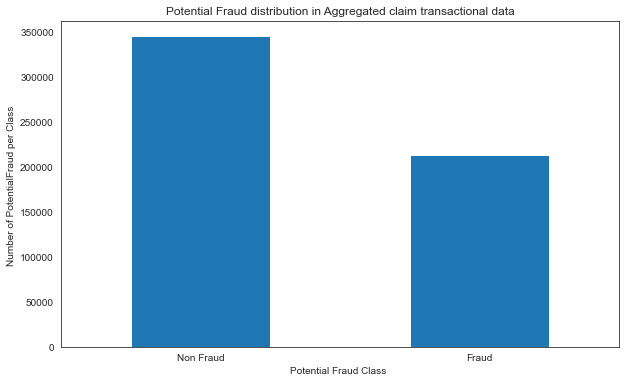

In [8]:
#PLotting the frequencies of fraud and non-fraud Merged transactions in the data

sns.set_style('white',rc={'figure.figsize':(12,8)})
count_classes = pd.value_counts(medicare_fraud['PotentialFraud'], sort = True)
print("Percent Distribution of Potential Fraud class:- \n",count_classes*100/len(medicare_fraud))
LABELS = ["Non Fraud", "Fraud"]
#Drawing a barplot
count_classes.plot(kind = 'bar', rot=0,figsize=(10,6))

#Giving titles and labels to the plot
plt.title("Potential Fraud distribution in Aggregated claim transactional data")
plt.xticks(range(2), LABELS)
plt.xlabel("Potential Fraud Class ")
plt.ylabel("Number of PotentialFraud per Class ")

plt.savefig('Potential Fraud Distribution In MergedData')

# State - wise Percent Beneficiary Distribution

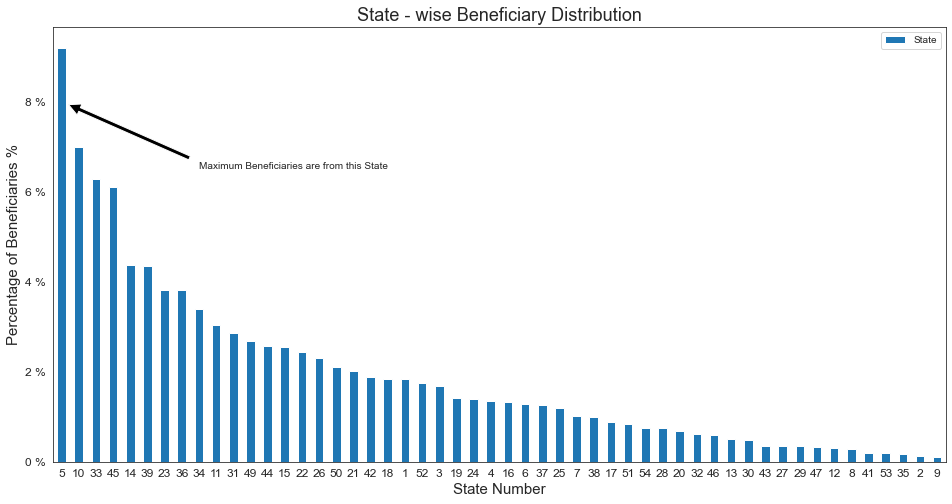

<Figure size 432x288 with 0 Axes>

In [9]:
#PLotting the frequencies of Statewise beneficiaries
count_States = pd.value_counts(medicare_fraud['State'], sort = True)
#print("Percent Distribution of Beneficieries per state:- \n",count_States*100/len(Train_Beneficiarydata))

#Drawing a barplot
(count_States*100/len(medicare_fraud)).plot(kind = 'bar', rot=0,figsize=(16,8),fontsize=12,legend=True)

#Giving titles and labels to the plot

plt.annotate('Maximum Beneficiaries are from this State', xy=(0.01,8), xytext=(8, 6.5),arrowprops=dict(facecolor='black', shrink=0.05))

plt.yticks(np.arange(0,10,2), ('0 %','2 %', '4 %', '6 %', '8 %'))
plt.title("State - wise Beneficiary Distribution",fontsize=18)
plt.xlabel("State Number",fontsize=15)
plt.ylabel("Percentage of Beneficiaries "'%',fontsize=15)
plt.show()

plt.savefig('State Wise Beneficiary Distribution')

Above Plot shows top states with their beneficiary percentage distribution.States 5,10,45 are top states in terms of beneficiary percentage

Race-wise Percent Distribution of Beneficiaries

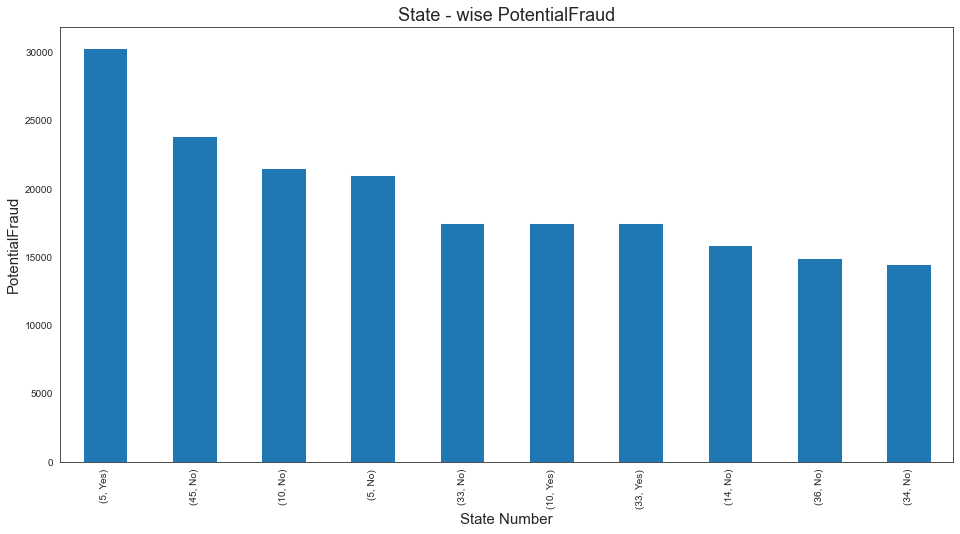

<Figure size 432x288 with 0 Axes>

In [10]:
medicare_fraud.groupby(['State','PotentialFraud'])['PotentialFraud'].count().sort_values(ascending=False)[:10].plot.bar(figsize=(16,8))
plt.title("State - wise PotentialFraud",fontsize=18)
plt.xlabel("State Number",fontsize=15)
plt.ylabel("PotentialFraud",fontsize=15)
plt.show()

plt.savefig('State Wise Potential Fraud')

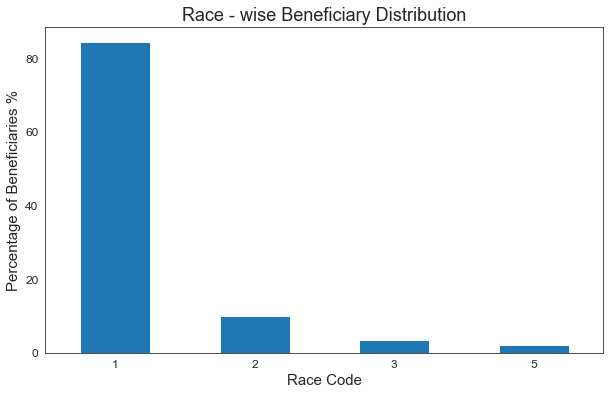

<Figure size 432x288 with 0 Axes>

In [11]:
#PLotting the frequencies of race-wise beneficiaries
count_Race = pd.value_counts(medicare_fraud['Race'], sort = True)

#Drawing a barplot
(count_Race*100/len(medicare_fraud)).plot(kind = 'bar', rot=0,figsize=(10,6),fontsize=12)

#Giving titles and labels to the plot
plt.yticks(np.arange(0,100,20))#, ('0 %','20 %', '40 %', '60 %', '80 %', '100%'))
plt.title("Race - wise Beneficiary Distribution",fontsize=18)
plt.xlabel("Race Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries "'%',fontsize=15)

plt.show()

plt.savefig('Race wise Beneficiary Distribution')


It seems that more than 80% beneficiaries are of same race which is Race 1 which means Maximum population in the dataset originated from same race.There is no race 4 in the dataset

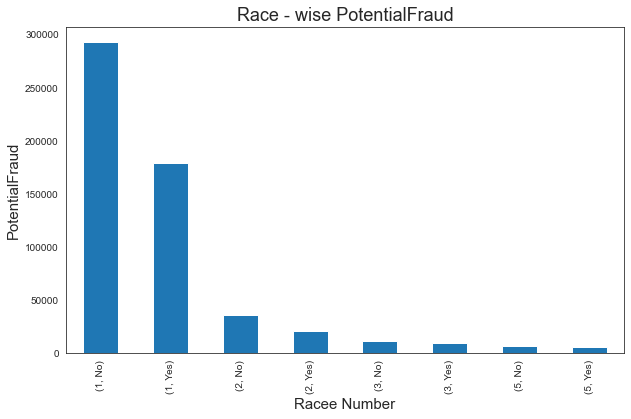

<Figure size 432x288 with 0 Axes>

In [12]:
medicare_fraud.groupby(['Race','PotentialFraud'])['PotentialFraud'].count().sort_values(ascending=False).plot.bar(figsize=(10,6))
plt.title("Race - wise PotentialFraud",fontsize=18)
plt.xlabel("Racee Number",fontsize=15)
plt.ylabel("PotentialFraud",fontsize=15)
plt.show()

plt.savefig('Race Wise Potential Fraud')

# Top-10 Procedures invloved in Healthcare Fraud

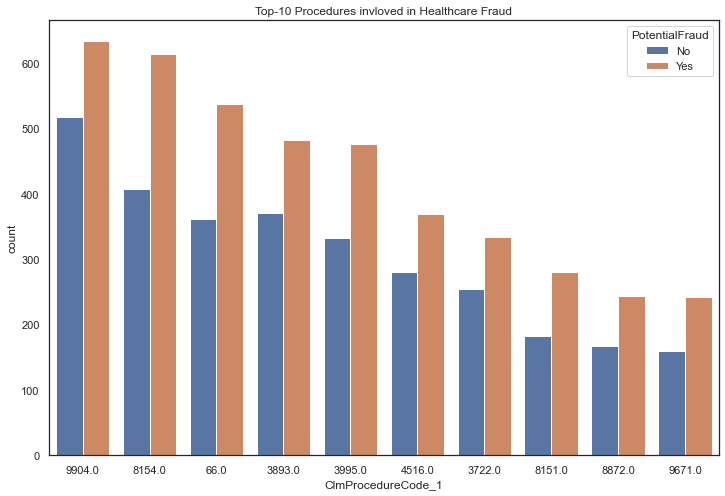

<Figure size 864x576 with 0 Axes>

In [13]:
## Lets plot countplot for each fraud non fraud categories

sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='ClmProcedureCode_1',hue='PotentialFraud',data=medicare_fraud
              ,order=medicare_fraud.ClmProcedureCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Procedures invloved in Healthcare Fraud')
    
plt.show()

plt.savefig('Top Procedures invloved in Healthcare Fraud')

From the above plot,we can say that Procedure 9904,8154,66 are top procedures (in terms of money involved).Distribution of fraud and non fraud count shows suspicious transactions involved in them.

# Top-10 Diagnosis invloved in Healthcare Fraud

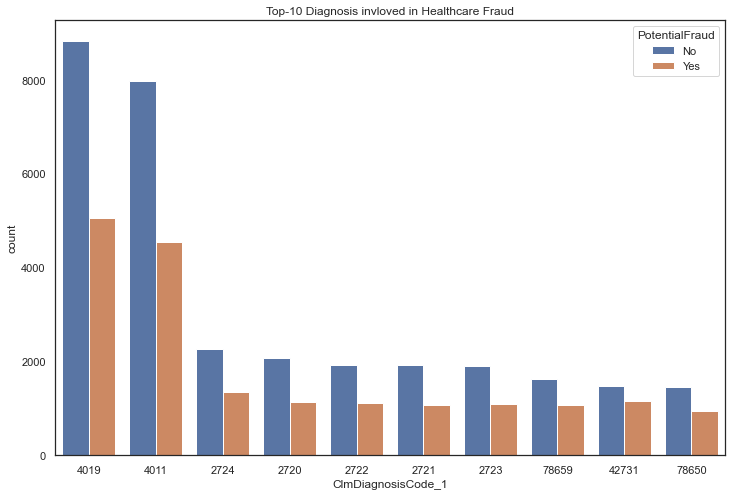

<Figure size 864x576 with 0 Axes>

In [14]:
## lets plot Top-10 Claim Diagnosis  invloved in Healthcare Fraud

sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.countplot(x='ClmDiagnosisCode_1',hue='PotentialFraud',data=medicare_fraud
              ,order=medicare_fraud.ClmDiagnosisCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Diagnosis invloved in Healthcare Fraud')
plt.show()

plt.savefig('Top Diagnosis Innvloved in Healthcare Fraud')

From the above plot,we can say that diagnosis 4019,4011,2724 are top diagnosis (in terms of money involved).Distribution of fraud and non fraud counts shows suspicious transactions involved in them.

# Top-20 Attending Physicians invloved in Healthcare Fraud

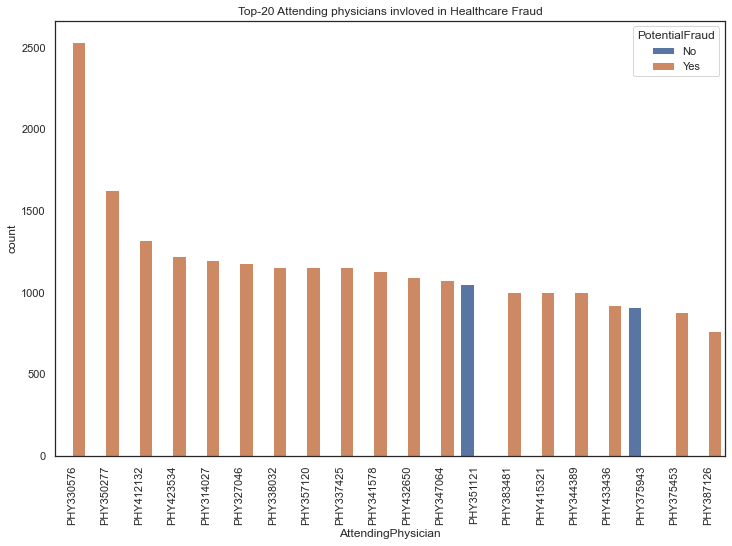

<Figure size 864x576 with 0 Axes>

In [15]:
### lets plot Top-20 Attending Physicians invloved in Healthcare Fraud 

sns.set(rc={'figure.figsize':(12,8)},style='white')

ax= sns.countplot(x='AttendingPhysician',hue='PotentialFraud',data=medicare_fraud
              ,order=medicare_fraud.AttendingPhysician.value_counts().iloc[:20].index)

    
plt.title('Top-20 Attending physicians invloved in Healthcare Fraud')
plt.xticks(rotation=90)
plt.show()

plt.savefig('Top Attending physicians invloved in Healthcare Fraud')

In the above plot,we see count of involvement of attending physicians.And flags the nature of provider where they are working is whether fraud or non fraud.

# IPAnnualDeductibleAmt Vs IPAnnualReimbursementAmt Fraud and non Fraud Categories¶

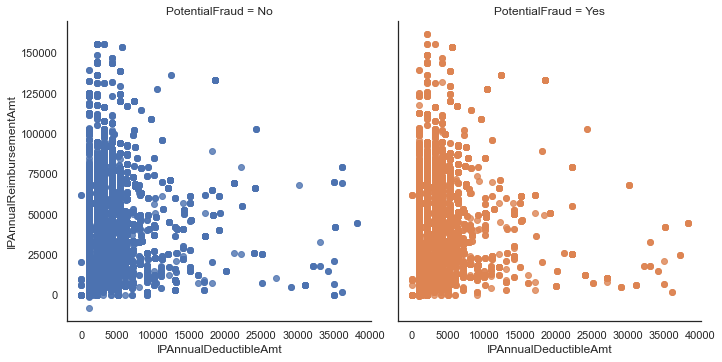

In [16]:
## Lets Plot IPAnnualDeductibleAmt and IPAnnualReimbursementAmt in both fraud and non Fraud Categoories

sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.lmplot(x='IPAnnualDeductibleAmt',y='IPAnnualReimbursementAmt',hue='PotentialFraud',
           col='PotentialFraud',fit_reg=False,data=medicare_fraud)


#plt.title('IPAnnualDeductibleAmt and IPAnnualReimbursementAmt in both fraud and non Fraud Categoories')

plt.savefig('IPAnnualDeductibleAmtandIPAnnualReimbursementAmtinbothfraudandnonFraud')

As we see in the above graph,there is no visible difference in IpAnnualDeductibleAmt and IPAnnualReimbursementAm

# DeductibleAmtPaid Vs InsClaimAmtReimbursed in Fraud and non Fraud Categories

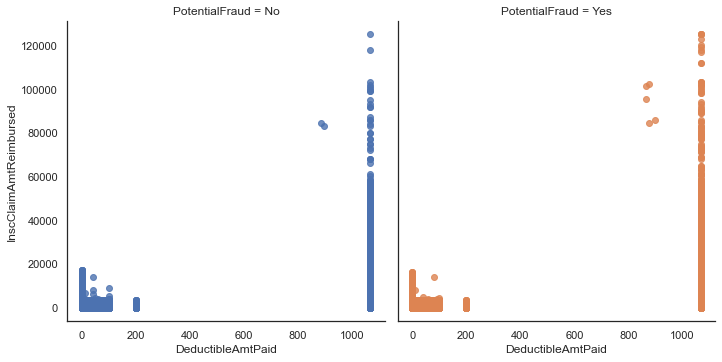

In [17]:
## Lets Plot DeductibleAmtPaid and InsClaimAmtReimbursed in both fraud and non Fraud Categoories

sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.lmplot(x='DeductibleAmtPaid',y='InscClaimAmtReimbursed',hue='PotentialFraud',
           col='PotentialFraud',fit_reg=False,data=medicare_fraud)


plt.savefig('DeductibleAmtPaidandInsClaimAmtReimbursed')

We can not differentiate between fraud and non fraud cases based only on DeductibleAmtPaid and InscClaimAmtReimbursed.This lets us derive more features from datasets.

# Insurance Claim Amount Reimbursed Vs Age in Fraud and Non Fraud

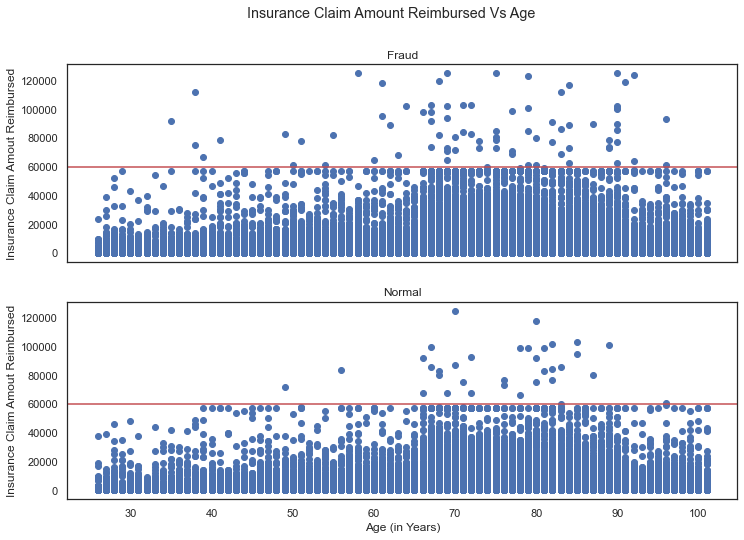

In [18]:
## Let's See Insurance Claim Amount Reimbursed Vs Age
sns.set(rc={'figure.figsize':(12,8)},style='white')

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Insurance Claim Amount Reimbursed Vs Age')

ax1.scatter(medicare_fraud[medicare_fraud.PotentialFraud=='Yes'].Age, 
            medicare_fraud[medicare_fraud.PotentialFraud=='Yes'].InscClaimAmtReimbursed)
ax1.set_title('Fraud')
ax1.axhline(y=60000,c='r')
ax1.set_ylabel('Insurance Claim Amout Reimbursed')

ax2.scatter(medicare_fraud[medicare_fraud.PotentialFraud=='No'].Age, 
            medicare_fraud[medicare_fraud.PotentialFraud=='No'].InscClaimAmtReimbursed)
ax2.set_title('Normal')
ax2.axhline(y=60000,c='r')
ax2.set_xlabel('Age (in Years)')
ax2.set_ylabel('Insurance Claim Amout Reimbursed')

plt.show()
f.savefig('AgeVsClaimAmtReimbursed')

From the above graph,we see that occurance of fraud cases is more frequent in lower age groups(30-70 years) compared to higher age groups(70+ years).Age is one of the important feature for differentiating between fraud abd non fraud behaviour.

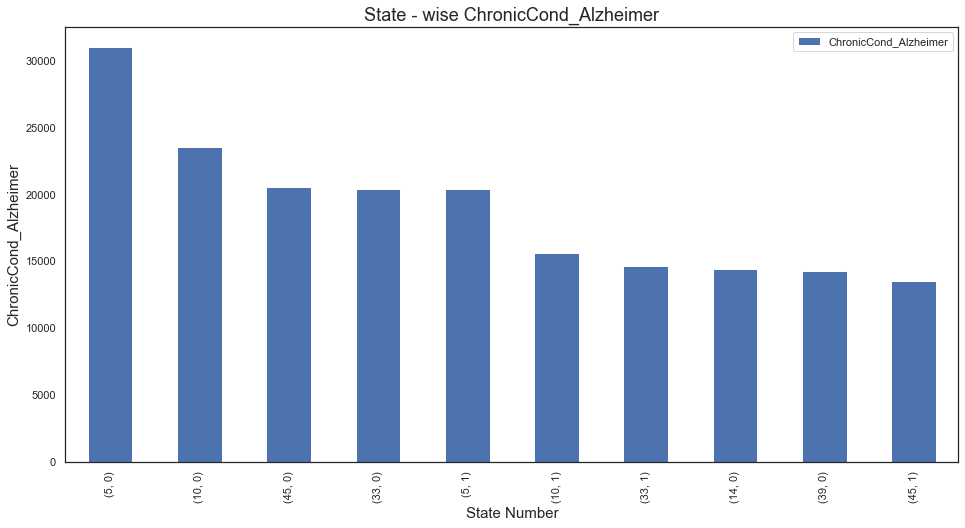

<Figure size 864x576 with 0 Axes>

In [19]:
medicare_fraud.groupby(['State','ChronicCond_Alzheimer'])['ChronicCond_Alzheimer'].count().sort_values(ascending=False)[:10].plot.bar(figsize=(16,8))
plt.title("State - wise ChronicCond_Alzheimer",fontsize=18)
plt.xlabel("State Number",fontsize=15)
plt.ylabel("ChronicCond_Alzheimer",fontsize=15)
plt.legend()
plt.show()

plt.savefig('State Wise ChronicCond_Alzheimer')

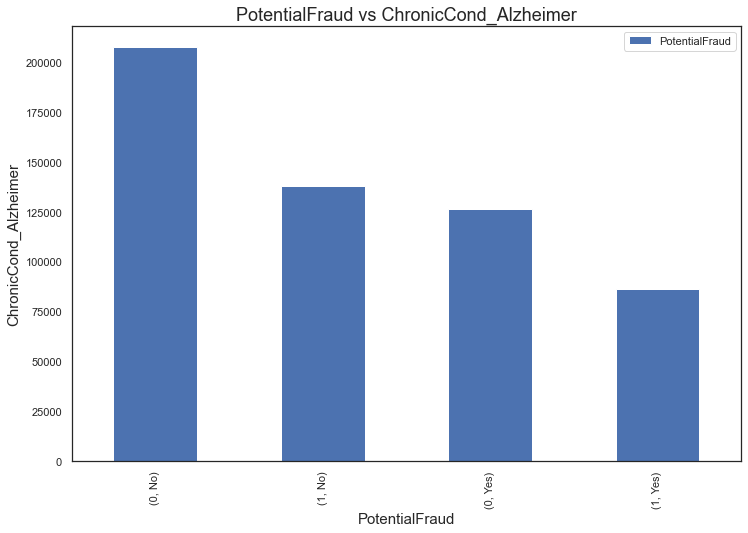

<Figure size 864x576 with 0 Axes>

In [20]:
medicare_fraud.groupby(['ChronicCond_Alzheimer','PotentialFraud'])['PotentialFraud'].count().sort_values(ascending=False).plot.bar(figsize=(12,8))
plt.title("PotentialFraud vs ChronicCond_Alzheimer",fontsize=18)
plt.xlabel("PotentialFraud",fontsize=15)
plt.ylabel("ChronicCond_Alzheimer",fontsize=15)
plt.legend()
plt.show()

plt.savefig('PotentialFraud vs ChronicCond_Alzheimer')

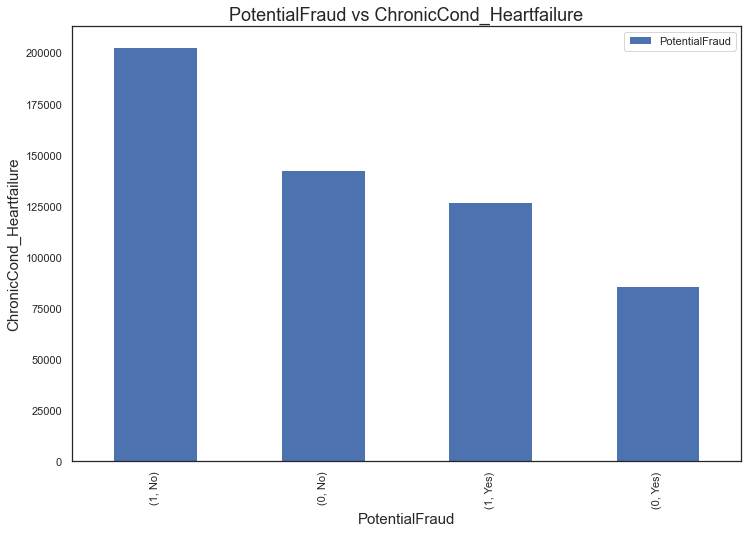

<Figure size 864x576 with 0 Axes>

In [21]:
medicare_fraud.groupby(['ChronicCond_Heartfailure','PotentialFraud'])['PotentialFraud'].count().sort_values(ascending=False).plot.bar(figsize=(12,8))
plt.title("PotentialFraud vs ChronicCond_Heartfailure",fontsize=18)
plt.xlabel("PotentialFraud",fontsize=15)
plt.ylabel("ChronicCond_Heartfailure",fontsize=15)
plt.legend()
plt.show()

plt.savefig('PotentialFraud vs ChronicCond_Heartfailure')

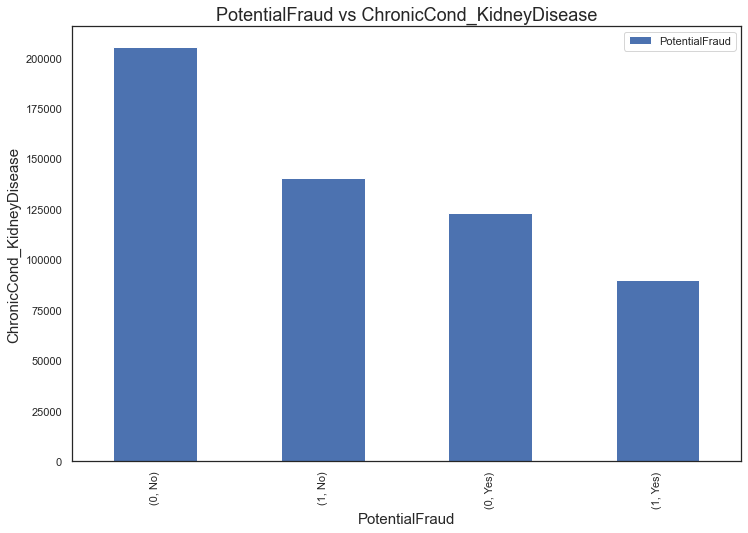

<Figure size 864x576 with 0 Axes>

In [22]:
medicare_fraud.groupby(['ChronicCond_KidneyDisease','PotentialFraud'])['PotentialFraud'].count().sort_values(ascending=False).plot.bar(figsize=(12,8))
plt.title("PotentialFraud vs ChronicCond_KidneyDisease",fontsize=18)
plt.xlabel("PotentialFraud",fontsize=15)
plt.ylabel("ChronicCond_KidneyDisease",fontsize=15)
plt.legend()
plt.show()

plt.savefig('PotentialFraud vs ChronicCond_KidneyDisease')

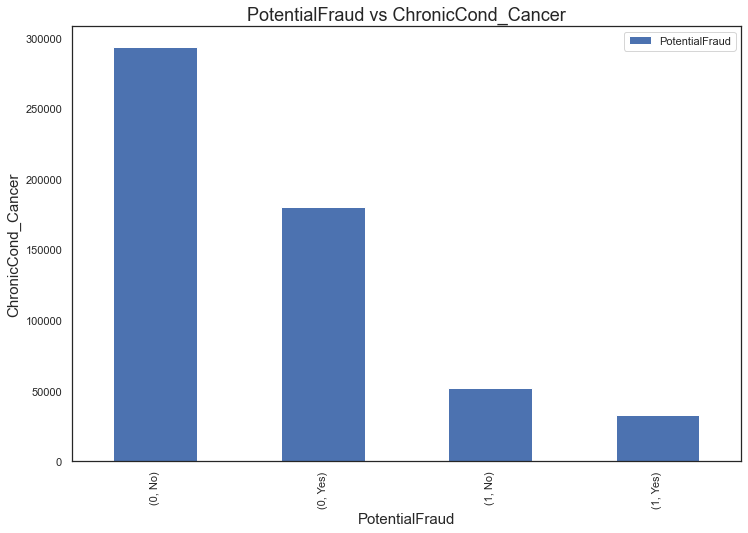

<Figure size 864x576 with 0 Axes>

In [23]:
medicare_fraud.groupby(['ChronicCond_Cancer','PotentialFraud'])['PotentialFraud'].count().sort_values(ascending=False).plot.bar(figsize=(12,8))
plt.title("PotentialFraud vs ChronicCond_Cancer",fontsize=18)
plt.xlabel("PotentialFraud",fontsize=15)
plt.ylabel("ChronicCond_Cancer",fontsize=15)
plt.legend()
plt.show()

plt.savefig('PotentialFraud vs ChronicCond_Cancer')

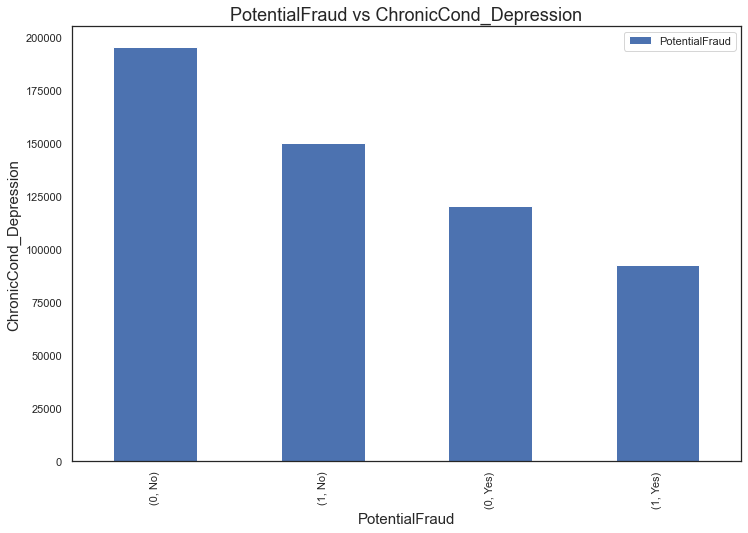

<Figure size 864x576 with 0 Axes>

In [24]:
medicare_fraud.groupby(['ChronicCond_Depression','PotentialFraud'])['PotentialFraud'].count().sort_values(ascending=False).plot.bar(figsize=(12,8))
plt.title("PotentialFraud vs ChronicCond_Depression",fontsize=18)
plt.xlabel("PotentialFraud",fontsize=15)
plt.ylabel("ChronicCond_Depression",fontsize=15)
plt.legend()
plt.show()

plt.savefig('PotentialFraud vs ChronicCond_Depression')

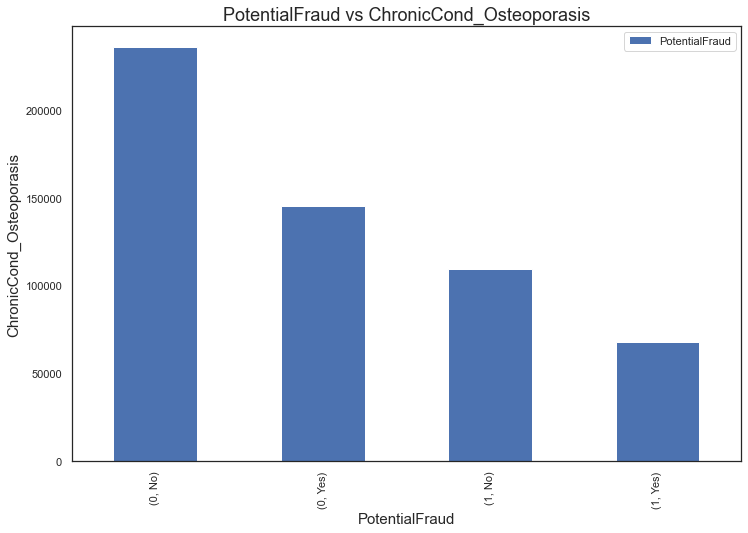

<Figure size 864x576 with 0 Axes>

In [25]:
medicare_fraud.groupby(['ChronicCond_Osteoporasis','PotentialFraud'])['PotentialFraud'].count().sort_values(ascending=False).plot.bar(figsize=(12,8))
plt.title("PotentialFraud vs ChronicCond_Osteoporasis",fontsize=18)
plt.xlabel("PotentialFraud",fontsize=15)
plt.ylabel("ChronicCond_Osteoporasis",fontsize=15)
plt.legend()
plt.show()

plt.savefig('PotentialFraud vs ChronicCond_Osteoporasis')